In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns 

In [2]:
df=pd.read_csv('/Users/4star/Desktop//retail_sales_dataset.csv')

In [3]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [4]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
#checking description
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [6]:
#size
df.size

9000

In [7]:
#shape of dataset
df.shape

(1000, 9)

In [8]:
#checking for Null values 
null_count =df.isnull().sum()
null_count

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [9]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
print(df['Date'].dtypes)

datetime64[ns]


In [11]:
# Grouping the data by date to analyze sales trends over time
sales_trends = df.groupby('Date').agg({
    'Total Amount': 'sum',
    'Transaction ID': 'count'
}).rename(columns={'Transaction ID': 'Number of Transactions'})

sales_trends.head()


,Total Amount,Number of Transactions
Date,,
2023-01-01,3600,3
2023-01-02,1765,4
2023-01-03,600,1
2023-01-04,1240,3
2023-01-05,1100,3


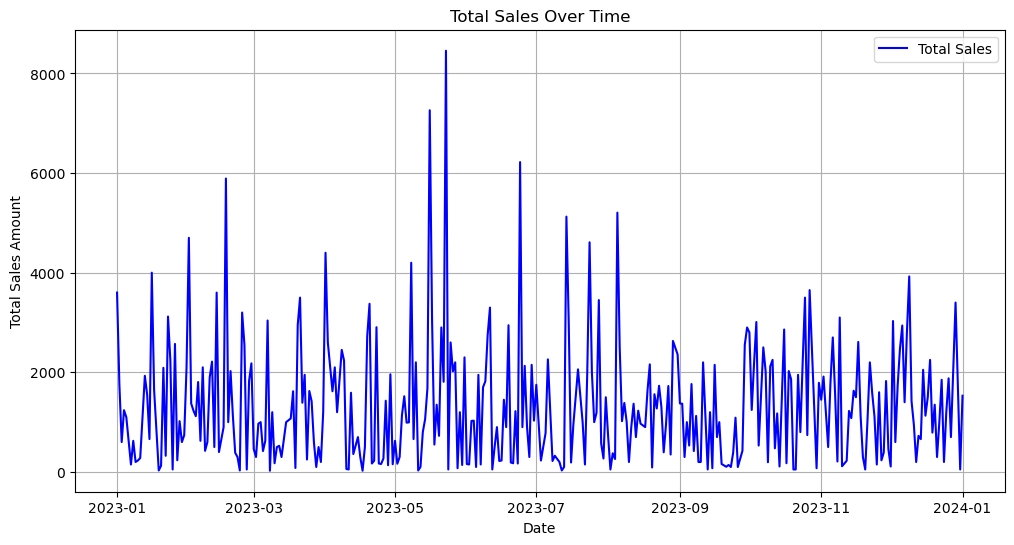

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(sales_trends.index, sales_trends['Total Amount'], label='Total Sales', color='blue')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.legend()
plt.show()

In [13]:
df['Product Category'].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

<Axes: xlabel='Product Category', ylabel='count'>

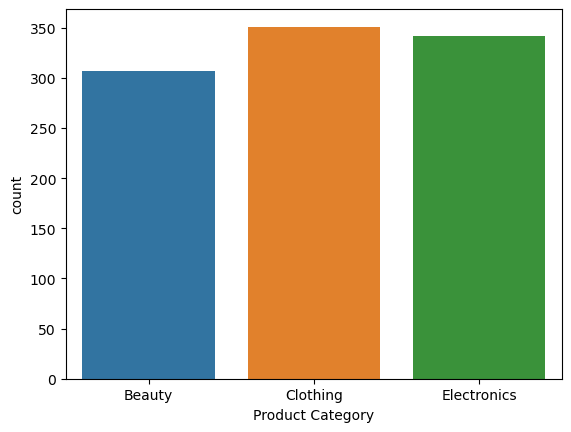

In [14]:
sns.countplot(x=df['Product Category'])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

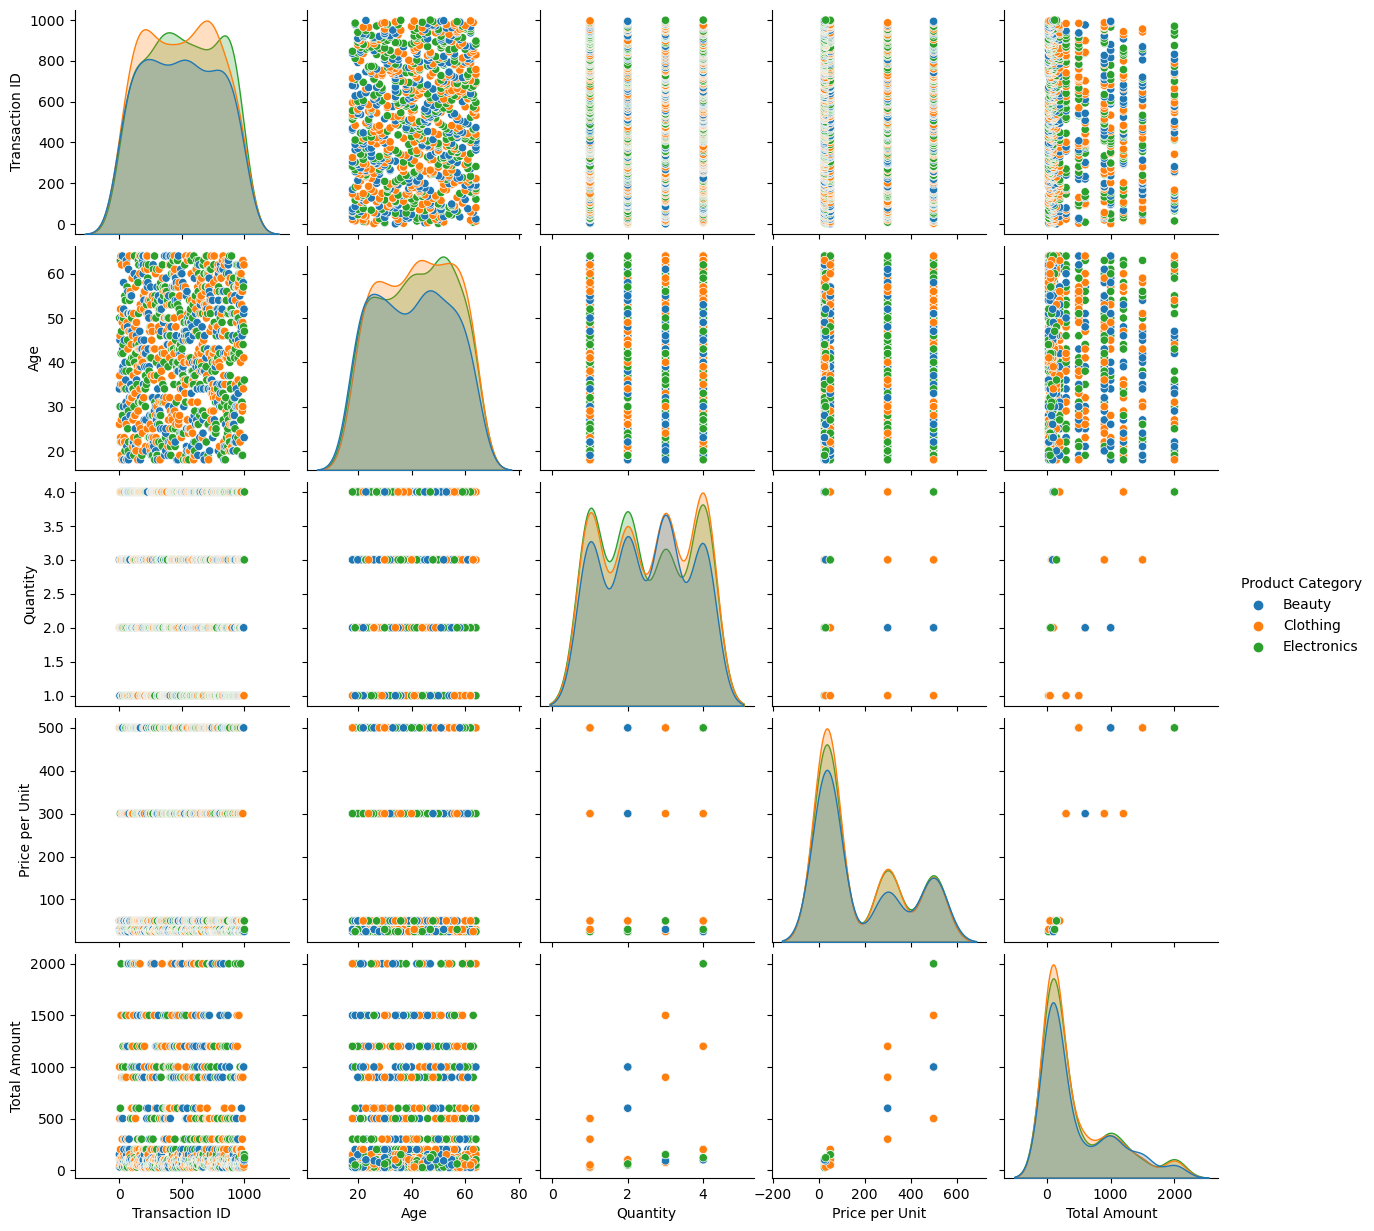

In [18]:
sns.pairplot(data=df, hue="Product Category")

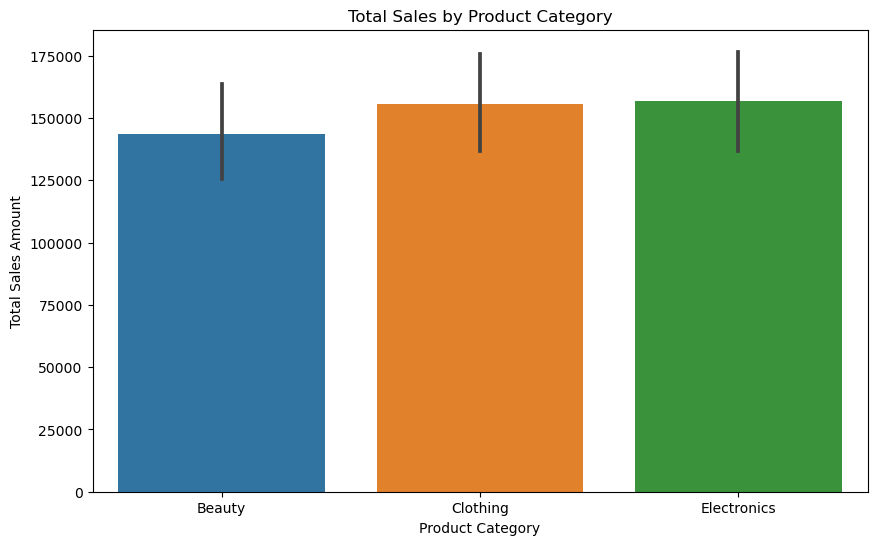

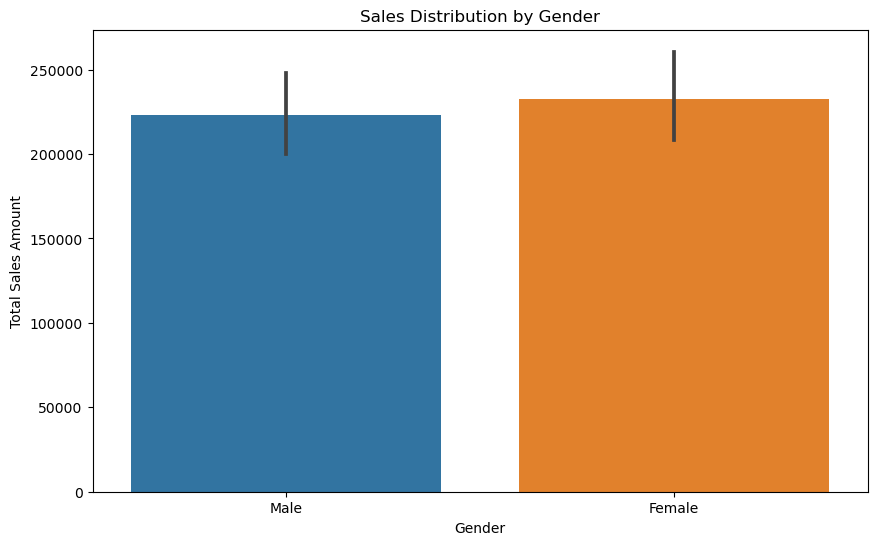

In [19]:

# Total Sales by Product Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Total Amount', data=df, estimator=sum)
plt.title('Total Sales by Product Category')
plt.ylabel('Total Sales Amount')
plt.show()

# Sales Distribution by Gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Total Amount', data=df, estimator=sum)
plt.title('Sales Distribution by Gender')
plt.ylabel('Total Sales Amount')
plt.show()


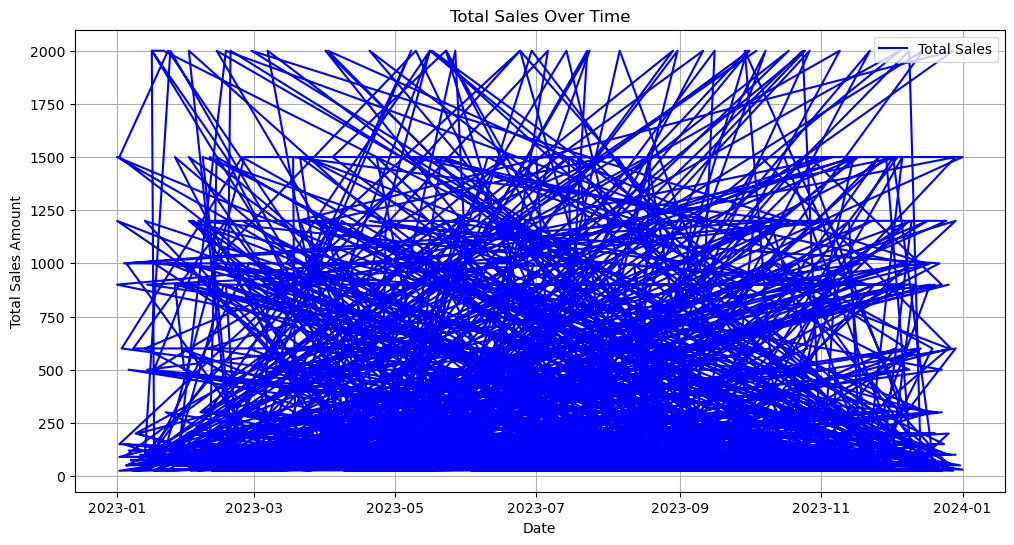

In [20]:
# Sales Trends Over Time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Total Amount'], label='Total Sales', color='blue')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.legend()
plt.show()


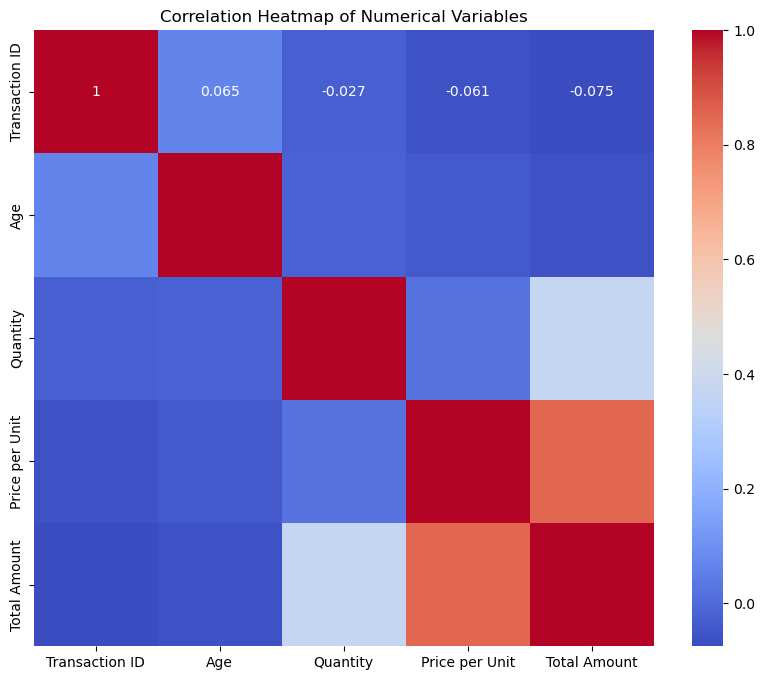

In [25]:

# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()
